In [146]:
import numpy as np
import xarray as xr
import regionate

import cftime
import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 12})

In [147]:
wmt = xr.open_dataset('../paper/data/baltic_wmb_natv_hourly_for_decompositions.nc')
wmt_newbins = xr.open_dataset('../paper/data/baltic_wmb_natv_hourly_for_decompositions_newbins.nc')
wmt_maps = xr.open_dataset("../paper/data/baltic_wmb_natv_hourly_maps.nc")
transport = xr.open_dataset("../paper/data/baltic_wmb_natv_hourly_boundary_transport.nc").mean("time")

thetao0 = wmt_maps.thetao_l_target.values

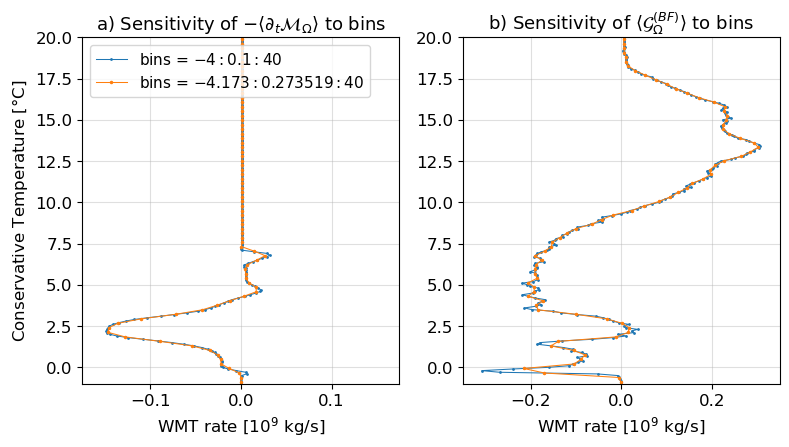

In [149]:
plt.figure(figsize=(9,4.5))

plt.subplot(1,2,1)
(wmt['mass_tendency']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4:0.1:40$", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['mass_tendency']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4.173:0.273519:40$", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(-1, 20)
plt.xlim(-0.175, 0.175)
plt.ylabel("")
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]")
plt.legend(loc="upper left", fontsize=11)
plt.ylabel(r"Conservative Temperature [$\degree$C]")
plt.title(r"a) Sensitivity of $-\langle \partial_{t} \mathcal{M}_{\Omega} \rangle$ to bins", fontsize=13)

plt.subplot(1,2,2)
(wmt['boundary_fluxes']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4:0.1:40$", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['boundary_fluxes']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4.173:0.273519:40$", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(-1, 20)
plt.xlim(-0.35, 0.35)
plt.ylabel("")
plt.xlabel(r"WMT rate [$10^{9}$ kg/s]")
plt.title(r"b) Sensitivity of $\langle \mathcal{G}^{(BF)}_{\Omega} \rangle$ to bins", fontsize=13);

plt.savefig("figures/lambda_bin_sensitivity.png", bbox_inches="tight", dpi=250)

/vftmp/Henri.Drake/pid4362/ipykernel_14214/3120322334.py:50: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pc2, label="seafloor depth [m]", ax=axes[:,:], shrink=0.8)
/vftmp/Henri.Drake/pid4362/ipykernel_14214/3120322334.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pc1, label=r"WMT rate per unit area [$10^{-3}$ kg/m$^{2}/s]$", ax=axes[:,:], shrink=0.8)


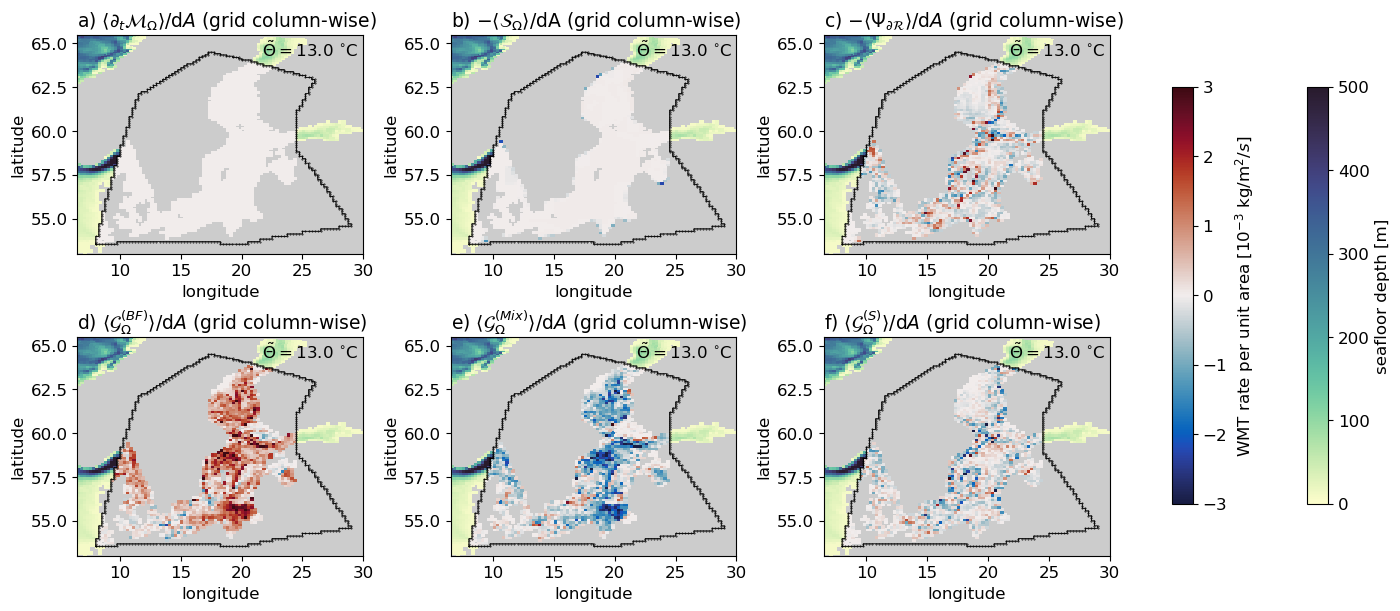

In [151]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.8, 0.8, 0.8, 1))

div_cmap = cmocean.cm.balance.copy()
div_cmap.set_bad((0.6, 0.6, 0.6, 1))

fig, axes = plt.subplots(2,3,figsize=(14,6), layout="constrained")

for ax in axes.flatten():
    ax.set_facecolor(cmap.get_bad())

signs = [1, -1, -1, 1, 1, 1]
terms = ["mass_tendency", "mass_source", "convergent_mass_transport", "boundary_fluxes", "diffusion", "spurious_numerical_mixing"]
titles = [
    r"a) $\langle \partial_{t} \mathcal{M}_{\Omega} \rangle/$d$A$",
    r"b) $-\langle \mathcal{S}_{\Omega} \rangle/$dA",
    r"c) $-\langle \Psi_{\partial \mathcal{R}} \rangle/$d$A$",
    r"d) $\langle \mathcal{G}_{\Omega}^{(BF)} \rangle/$d$A$",
    r"e) $\langle \mathcal{G}_{\Omega}^{(Mix)} \rangle/$d$A$",
    r"f) $\langle \mathcal{G}_{\Omega}^{(S)} \rangle/$d$A$"
]
for ax, sign, term, title in zip(
    axes.flatten(),
    signs,
    terms,
    titles
):
    pc1 = ax.pcolor(
        wmt_maps.geolon_c,
        wmt_maps.geolat_c,
        (sign*wmt_maps[term]/wmt_maps.areacello*1e3).mean('time').where(wmt_maps.mask & (~np.isnan(wmt_maps.deptho)), np.nan),
        cmap=div_cmap, vmin=-3, vmax=3
    )

    pc2 = ax.pcolor(
        wmt_maps.geolon_c,
        wmt_maps.geolat_c,
        wmt_maps.deptho.where(~wmt_maps.mask, np.nan),
        cmap=cmap,
        vmin=0, vmax=500
    )
    ax.plot(regionate.loop(transport.region_lons), regionate.loop(transport.region_lats), color="k", linewidth=0.6, markersize=0.8, marker=".")
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    ax.set_xlim(6.5, 30)
    ax.set_ylim(53., 65.5)
    ax.set_title(f"{title} (grid column-wise)", loc="left", fontsize=13.5)
    ax.set_title("")
    ax.annotate(rf"$\tilde{{\Theta}} = {Theta0}$ $^{{\circ}}$C", xy=(0.985, 0.98), xytext=(0.985, 0.98), ha="right", va="top", xycoords="axes fraction")
fig.colorbar(pc2, label="seafloor depth [m]", ax=axes[:,:], shrink=0.8)
fig.colorbar(pc1, label=r"WMT rate per unit area [$10^{-3}$ kg/m$^{2}/s]$", ax=axes[:,:], shrink=0.8)
plt.savefig("figures/WMT_budget_maps.png", bbox_inches="tight", dpi=300)

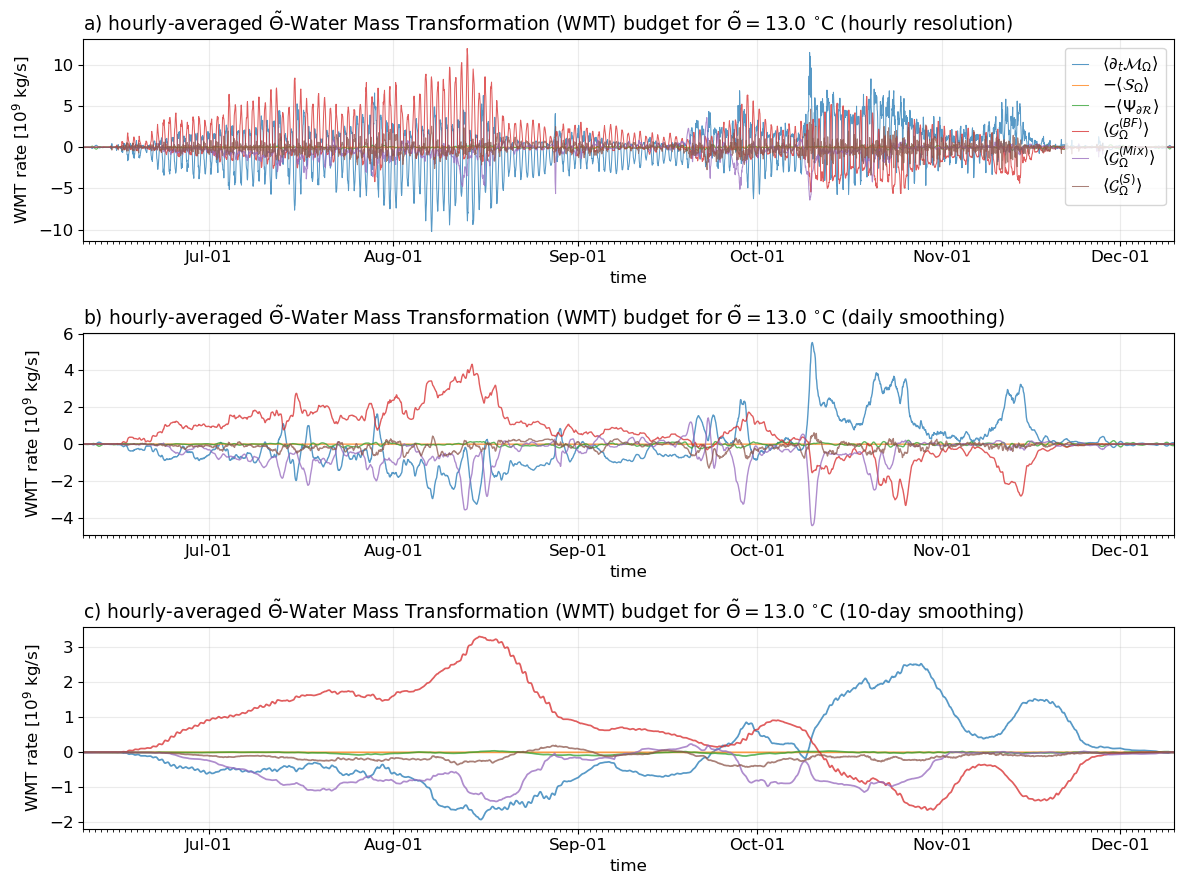

In [154]:
myFmt = mdates.DateFormatter('%b-%d')

fig, axes = plt.subplots(3,1,figsize=(12,9))

titles = [
    r"$\langle \partial_{t} \mathcal{M}_{\Omega} \rangle$",
    r"$-\langle \mathcal{S}_{\Omega} \rangle$",
    r"$-\langle \Psi_{\partial \mathcal{R}} \rangle$",
    r"$\langle \mathcal{G}_{\Omega}^{(BF)} \rangle$",
    r"$\langle \mathcal{G}_{\Omega}^{(Mix)} \rangle$",
    r"$\langle \mathcal{G}_{\Omega}^{(S)} \rangle$"
]
for sign, term, title in zip(signs, terms, titles):
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).plot(ax=axes[0], label=title, alpha=0.75, lw=0.75)
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).rolling({"time":24},min_periods=1).mean("time").plot(ax=axes[1], label=title, alpha=0.75, lw=1.)
    (sign*wmt_maps[term].sum(["xh", "yh"])*1e-9).rolling({"time":24*10},min_periods=1).mean("time").plot(ax=axes[2], label=title, alpha=0.75, lw=1.25)
Theta0 = str(np.round(wmt_maps.thetao_l_target.values, decimals=1))
titles = [rf"{p}) hourly-averaged $\tilde{{\Theta}}$-Water Mass Transformation (WMT) budget for $\tilde{{\Theta}} = {Theta0}$ $^{{\circ}}$C {t}"
          for p,t in zip(["a","b","c"], ["(hourly resolution)", "(daily smoothing)", "(10-day smoothing)"])]
for ax, title in zip(axes, titles):
    ax.set_xlim(cftime.datetime(year=1900, month=6, day=10), cftime.datetime(year=1900, month=12, day=10))
    ax.set_title(title, loc="left", fontsize=13.5)
    ax.set_title("")
    ax.set_xlabel("time")
    ax.set_ylabel(r"WMT rate [$10^{9}$ kg/s]")
    ax.grid(True, alpha=0.25)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(myFmt)
axes[0].legend(loc="upper right", handlelength=1., labelspacing=0.09)
fig.tight_layout()
plt.savefig("figures/WMT_budget_timeseries.png", bbox_inches="tight", dpi=300)

/vftmp/Henri.Drake/pid4362/ipykernel_14214/3815048957.py:14: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(label="seafloor depth [m]")


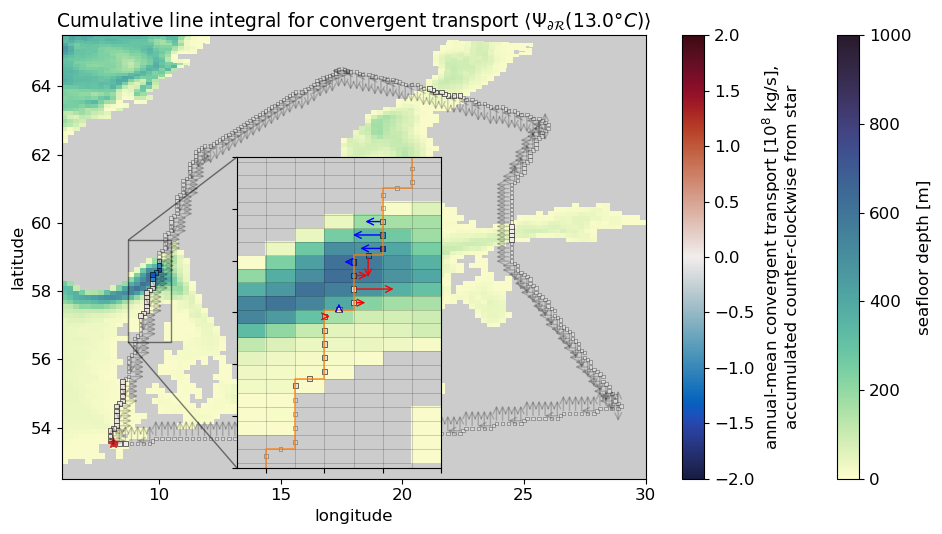

In [156]:
deep_cmap = cmocean.cm.deep.copy()
deep_cmap.set_bad((0.8, 0.8, 0.8))

fig, ax = plt.subplots(figsize=(10, 5.5))
ax.set_facecolor(deep_cmap.get_bad())
plt.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
plt.colorbar(label="seafloor depth [m]")
for p in transport.convergent_transport:
    plt.annotate(
        text="",
        xy=(p.lon_sect.values +p.sign.values*(p.dir.values=="U")*1.5*0.5, p.lat_sect.values +p.sign.values*(p.dir.values=="V")*1.5*0.4),
        xytext=(p.lon_sect.values, p.lat_sect.values),
        arrowprops=dict(arrowstyle="->", facecolor='black', alpha=0.2)
    )

sc = plt.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 6,
    cmap=cmocean.cm.balance,
    vmin = -2,
    vmax = 2,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = plt.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 11,
    cmap=cmocean.cm.balance,
    vmin = -2,
    vmax = 2,
    edgecolor="k",
    linewidth=0.4,
)

plt.plot(
    transport.convergent_transport.lon_sect[0],
    transport.convergent_transport.lat_sect[0],
    "C3*",
    markersize=8
)

plt.colorbar(sc, label="annual-mean convergent transport [$10^{8}$ kg/s],\n"+r"accumulated counter-clockwise from star")
plt.xlim(6,30)
plt.ylim(52.5, 65.5)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(rf"Cumulative line integral for convergent transport $\langle \Psi_{{\partial \mathcal{{R}}}} ({Theta0} \degree C) \rangle$", fontsize=13.5);

###
# inset axes
x1, x2, y1, y2 = 8.75, 10.5, 56.5, 59.5
axins = ax.inset_axes(
    [0.3, 0.025, 0.35, 0.7],
    xlim=(x1,x2), ylim=(y1,y2), xticklabels=[], yticklabels=[]
)
axins.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
for xq in wmt_maps.xq:
    axins.plot(
        wmt_maps.geolon_c.sel(xq=xq),
        wmt_maps.geolat_c.sel(xq=xq),
        color="k", alpha=0.25, lw=0.5
    )
for yq in wmt_maps.yq:
    axins.plot(
        wmt_maps.geolon_c.sel(yq=yq),
        wmt_maps.geolat_c.sel(yq=yq),
        color="k", alpha=0.25, lw=0.5
    )
axins.plot(transport.region_lons, transport.region_lats, "C1-", lw=1.25, alpha=0.75)

trans_max = np.abs(transport.convergent_transport).max()
for p in transport.convergent_transport:
    scale = p/trans_max
    color = "r" if p>0 else "b"
    if np.abs(scale) > 0.1:
        axins.annotate(
            text="",
            xy=(p.lon_sect.values +scale*p.sign.values*(p.dir.values=="U")*1.75*0.6*0.35, p.lat_sect.values +scale*p.sign.values*(p.dir.values=="V")*1.75*0.4*0.7),
            xytext=(p.lon_sect.values, p.lat_sect.values),
            arrowprops=dict(arrowstyle="->", color=color, alpha=1)
        )

sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-8,
    marker="s",
    s = 8,
    cmap=cmocean.cm.balance,
    vmin = -2,
    vmax = 2,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-8,
    marker="s",
    s = 14,
    cmap=cmocean.cm.balance,
    vmin = -2,
    vmax = 2,
    edgecolor="k",
    linewidth=0.4,
)
axins.set_facecolor(deep_cmap.get_bad())
ax.indicate_inset_zoom(axins, edgecolor="black")

##
plt.tight_layout();
plt.savefig("figures/convergent_mass_transport.png", bbox_inches="tight", dpi=300)